# **Modern Theory of Detection and Estimation**

## **Lab 3: Stock Price Prediction. Comparing Wiener and Adaptive LMS Filters**
### **Academic Year 2024/2025**

Bachelor's Degree in:
*   Mobile and Space Communications Engineering (Groups 61 and 65)
*   Sound and Image Engineering (Groups 66 and 69)
*   Telecommunication Technologies Engineering (Groups 91, 92, and 95)
*   Telematics Engineering (Groups 71 and 79)



**Signal Theory and Communications Department - UC3M**

**University Carlos III of Madrid (UC3M)**

## **Students information**

**Surname(s) and name(s):** Masa Fernández, Álvaro

**Group:** 91

**Date:** 11/12/2024

## **Logistics**

**Due Date**:

This assignment must be submitted by **11:59 PM** (**CET**) on **January 1, 2025**.


**Group work**:

You may work on this assignment in **groups of up to 4 students**. Only one member of the group is required to upload the completed Notebook solution to Aula Global. Please ensure that the submitted Notebook includes the f**ull names of all group members**.


**Setup Instructions**



1.   **Download the materials**: Access Aula Global (in the master group) and download the file provided for this assignment.
2.   **Save the file**: Store the file in your private workspace. Ensure the downloaded folder contains the file named `Lab_filtering_student_24_25.ipynb`.
3.   **Open the notebook**: Launch Google Colab and upload the notebook file.
4.   **Initialize the environment**: Be patient while the Jupyter server initializes; this process may take a minute.

Once the environment is ready, you can begin! The notebook is structured with dedicated sections for writing code solutions and answering questions.


**Submitting the solution for the Jupyter Notebook**

One member of the group must upload the final version of the Notebook file to Aula Global. Submissions can be made multiple times before the deadline; only the latest submission will be considered for grading.

**Late Submission Policy**:
*   Submissions **up to 1 day late** will incur a **20% penalty** on the final grade (applied to all group members).


*   Submissions **up to 2 days late** will face a **40% penalty**, and so on.

# **Objective**

Forecasting future values of time series is a critical challenge in fields such as finance, control systems, and signal processing. Filters like the Wiener filter and LMS adaptive filters are extensively used due to their mathematical rigor and effectiveness in handling noisy data. This assignment will guide students through the implementation of these filters and the evaluation of their performance using real-world stock market data.

#**What will the student do?**

*   **Analyze real-world financial data**:
    *   Work with data retrieved from Yahoo Finance for a selected stock (e.g., Apple, Microsoft). For this assignment, the dataset focuses on **Apple Inc. (AAPL)**, traded on the **NASDAQ market**.
    *   Perform **Exploratory Data Analysis** (EDA) to examine stock price trends, identify noise patterns, and assess market volatility.


*    **Implement predictive filters**:
    *   **Wiener filter**: A fixed-parameter filter that leverages past autocorrelation of the data to compute an optimal prediction under stationary conditions.
    *   **LMS adaptive filter**: A dynamic filter that continuously adjusts its parameters to adapt to changing trends and noise levels, making it suitable for non-stationary data.



*   **Tune parameters**:
    *  Experiment with **key filter parameters**, such as the order size for the Wiener filter and the learning rate for the LMS filter, to evaluate their impact on the prediction accuracy and adaptability to the data.

*   **Compare filters**:

    *  **Visualize the predictions** generated by each filter and compute error metrics (e.g., Mean Squared Error, Mean Absolute Error) to assess their performance and determine which filter is more effective under various conditions.




**LET'S GET STARTED 🚀!**

This assignment integrates theoretical concepts, practical implementation, and critical analysis to enhance students' comprehension of predictive filtering techniques.

The process begins with setting up the environment with the necessary libraries. Once the setup is complete, students can proceed to the next section to initiate data collection and exploratory data analysis.

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# 1.Apple Stock Data



## 1.1 Description

The **Apple Stock Data** was retrieved from Yahoo Finance, covering the period from **January 1, 2020**, to **January 1, 2024**. It provides daily trading information for Apple Inc., a leading technology company listed on the NASDAQ stock exchange. The dataset includes key financial indicators that reflect Apple's market performance and investor behavior during the selected time frame.

The dataset comprises **$1006$ daily records**, each containing **six numerical features** that offer insights into Apple's stock activity, including:
*   **Open Price** (`Open`): The price of the stock at the beginning of each trading day.
*   **High Price** (`High`): The highest price the stock reached during the trading day.
*   **Low Price** (`Low`): The lowest price the stock reached during the trading day.
*   **Close Price** (`Close`): The final price of the stock when the trading day ended.
*   **Adjusted Close Price** (`Adj Close`): The closing price adjusted for dividends and stock splits.
*   **Trading Volume** (`Volume`): The number of shares traded during the trading day.

This dataset holds significant value for examining stock market trends, analyzing volatility, and understanding trading behavior. It serves as an excellent resource for evaluating historical market performance, developing predictive models, and benchmarking the performance of stock forecasting algorithms.


For additional information about Apple's stock data, please refer to [Yahoo Finance's Apple Stock Page](https://finance.yahoo.com/quote/AAPL/?guccounter=1&guce_referrer=aHR0cHM6Ly9jaGF0Z3B0LmNvbS8&guce_referrer_sig=AQAAADp-JNEJGCt22jcXPGZH6MkDEe0c_kprUjI4Sc-qKhg7ltsRgEXd1nvaoNyuOZvTDc5TQOidEh-ySRciahQibvYK1m1ZC7ucdoF3Ynga3axeV4tLnbv5c-BOMEDBEXSGELA7aCJtNzYABbUvsq-Da_6QXz1pU6XhL5Y2pYlvlV9f). This source provides detailed historical and real-time data, along with insights into market trends and financial performance.





## 1.2 Getting the data

In this section, historical stock data for **Apple Inc. (AAPL**) will be retrieved from **Yahoo Finance** using the `yfinance` library, which was previously imported. The data covers the period from **January 1, 2020, to January 1, 2024**, encompassing four years of daily market activity.

The provided code enables the collection and organization of raw data required for predictive filtering tasks. Once downloaded, the data will be stored in a `Pandas DataFrame`, which can be used for visualization, preprocessing, and further analysis.

In [46]:
# Fetch stock data
stock_ticker = "AAPL"  # Apple Inc.
data = yf.download(stock_ticker, start="2020-01-01", end="2024-01-01")


*********************100%***********************]  1 of 1 completed

If the download is successful, you should see a confirmation message similar to the following:

`[*********************100%***********************]  1 of 1 completed`

## 1.3 Dataset analysis


Before proceeding with the analysis, it is important to examine the basic structure of the dataset by displaying its first few rows using the `head()` method. This step offers a quick overview of the data, including column names, the type of information contained (e.g., prices, volume), and the format of timestamps. Reviewing this preview helps ensure that the dataset has been loaded correctly and allows the identification of key features for subsequent analysis.

In [47]:
# Analyze the data structure
print(data.head())

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.796013  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.088280  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.662720  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.320969  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.484360  75.797501  76.110001  74.290001   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2020-01-02 00:00:00+00:00  74.059998  135480400  
2020-01-03 00:00:00+00:00  74.287498  146322800  
2020-01-06 00:00:00+00:00  73.447502  118387200  
2020-01-07 00:00:00+00:00  74.959999  108872000  
2020-01-08 00:00:00+00:00  74.290001  132079200  


To access a specific column in the dataset, the syntax `data['column_name']` can be used. For instance, to retrieve the stock's closing prices, the command `data['Close']` should be used. This approach facilitates the extraction and manipulation of individual columns for purposes such as analysis or visualization.



**Question**:

Using the `matplotlib` library, plot the stock's closing prices over time. Ensure that the x-axis represents the date, while the y-axis represents the stock price in USD. Add appropriate labels, a title, and a legend to make the plot clear and informative.



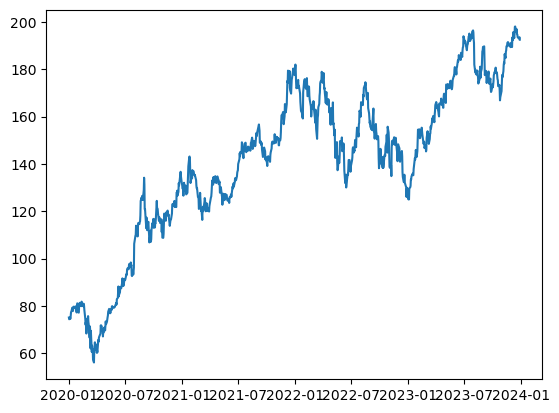

In [48]:
# YOUR CODE HERE
# Plot the stock closing prices
x = data['Close'];
plt.plot(x)

---

**Question**: What general trend do you observe in Apple's stock prices over the period shown? Based on this trend, what prediction would you make for the upcoming months after January 2024?

<font color = 'green'> YOUR ANSWER HERE </font>

It seems like Apple's stock prices are on the rise. I hope they go down, for the sake of humanity, but my unbiased prediction would be their stock price will rise even more in the next months.

---

So far, `data['Close']` is a `DataFrame`, but it needs to be converted into a `NumPy` array to proceed with the rest of the assignment. Let's do it!

In [49]:
# Convert to NumPy array
close_prices = data['Close'].values.flatten()

Finally, it is important to note that this assignment involves **predicting 5 consecutive days**, allowing for an evaluation of the filters' ability to forecast stock prices over multiple days. This task is critical in financial analysis, as it reflects the need to understand trends and long-term dependencies. Multi-step prediction aligns with real-world scenarios where decisions often rely on projected movements over several days.

While single-step prediction (one day) typically yields higher accuracy by minimizing error accumulation, it fails to capture the complexities of forecasting in dynamic environments like the stock market. By focusing on multi-step predictions, this assignment enables an assessment of the robustness of the Wiener and LMS filters in capturing AAPL stock trends and managing the inherent uncertainty in such forecasts.







## 1.4. Standardization of features
In Lab 1 (*Machine Learning for Regression*) and Lab 2 (*Machine Learning for Classification*), the importance of feature standardization in machine learning algorithms was discussed. Standardization involves rescaling features to have a mean of zero and a standard deviation of one.

Similarly, in signal processing tasks such as the Wiener and LMS filters, standardization is crucial for stable and efficient computations. It prevents numerical instabilities and facilitates faster convergence of the algorithms.

In this lab, standardization will be applied using the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class from `scikit-learn`. This ensures that the filters operate optimally across the dataset and deliver reliable results.

**Your task is as follows**:
*   Use the `StandardScaler` class from the `sklearn.preprocessing module` to standardize `close_prices`.

**Here's how you can do it**:

*  Create an instance of `StandardScaler`.
*  Fit the scaler using the data (`close_prices`).
*  Generate the new `NumPy` array as follows:
    - `close_prices_normalized`: It contains the standardized version of `close_prices`, obtained by transforming it with the fitted scaler.
    - Use `.ravel()` to flatten the resulting array, ensuring it matches the original shape of close_prices if it was one-dimensional initially.

In [50]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
close_prices_normalized = sc.fit_transform(close_prices.reshape(-1, 1)).ravel()

Let's verify that everything is correct. To do this, running the following code should confirm that the mean of variable `close_prices_normalized` is $0$ and its variance (or standard deviation) is $1$.

In [51]:
# Verify the mean and standard deviation of close_prices_normalized
mean = np.mean(close_prices_normalized)
std_dev = np.std(close_prices_normalized)

print(f"The mean of `close_prices_normalized` is {mean:.4f}, and the standard deviation is {std_dev:.4f}.")

The mean of `close_prices_normalized` is -0.0000, and the standard deviation is 1.0000.


Before proceeding, it is essential to calculate the mean and standard deviation of the original closing prices. These values are crucial because they will later be used to **denormalize** the predictions made using the normalized data. Denormalization transforms the normalized predictions back to the original scale, enabling meaningful interpretation and accurate comparison with the actual stock prices.

$\underline{\text{Note}}$: In this assignment, denormalization is necessary because the predictions generated by the Wiener and LMS filters are used to forecast stock prices on their original scale. Stock prices have real-world significance, and interpreting predictions directly in the normalized scale (mean $= 0$, standard deviation $= 1$) would lack practical value. By denormalizing, the predictions are converted back to their original scale, enabling direct comparison with actual stock prices and facilitating meaningful financial analysis.




**Your task is as follows**:


*   Calculate the mean and standard deviation of `close_prices`.
*   Store these values in the variables `mean_close` and `std_close`, respectively.

To perform these calculations, you can use the `mean` and `std` methods from the `NumPy` library.


In [52]:
#YOUR CODE HERE
mean_close = np.mean(close_prices)
std_close = np.std(close_prices)
print(f'The mean is {mean_close} and the standard deviation is {std_close}')

The mean is 140.80813123881225 and the standard deviation is 33.29729532323016


**Question**:

If you already have the mean and standard deviation of the `close_prices` array (stored in `mean_close` and `std_close`), can you determine how to standardize the data in the same way as the `StandardScaler` class from `scikit-learn`? Write the code you would use.

In [53]:
#YOUR CODE HERE
close_prices_manual_normalized = (close_prices - mean_close) / std_close # Estadistica I

Let's verify that everything is correct. To do so, let's calculate the mean and standard deviation of `close_prices_manual_normalized`. If the standardization was performed correctly, the mean should be approximately $0$, and the standard deviation should be approximately $1$. Use the following code to perform the check:

In [54]:
# Verify the mean and standard deviation of close_prices_manual_normalized
mean = np.mean(close_prices_manual_normalized)
std_dev = np.std(close_prices_manual_normalized)

print(f"The mean of close_prices_manual_normalized is {mean:.4f}, and the standard deviation is {std_dev:.4f}.")


The mean of close_prices_manual_normalized is -0.0000, and the standard deviation is 1.0000.


# 2.Evaluation metrics

To evaluate the quality of the predictions, metrics such as MAE (Mean Absolute Error), MSE (Mean Squared Error), and RMSE (Root Mean Squared Error) will be calculated in this assignment. These metrics compare the predicted values with the actual signal values, offering insights into how well the model captures the underlying trends. Lower values for these metrics indicate better predictive performance. This step is essential for assessing the accuracy and reliability of the predictions made by both the Wiener and LMS filters.

$\underline{\text{Note}}$: In this assignment, the coefficient $R^2$ is not ideal because it measures the proportion of variance explained relative to a baseline (e.g., the mean), which is less meaningful in time-series data like stock prices. Metrics like MAE, MSE, and RMSE are more suitable as they directly quantify prediction errors and align with the goal of minimizing error in filters like Wiener and LMS.

Next, a brief explanation of how each of these metrics is calculated and interpreted will be provided. This will help clarify their significance in evaluating the performance of predictions.

## 2.1 Mean Absolute Error (MAE)

It measures the average absolute difference between actual and predicted values. Lower values indicate better accuracy, as predictions deviate less from the true values.

  $
\text{MAE} = \displaystyle \frac{1}{N} \sum\limits_{i=1}^{N} \left| y_{\text{real}} - \widehat{y}_{\text{predicted}} \right|
$

## 2.2 Mean Squared Error (MSE)

It calculates the average of squared differences between actual and predicted values. Squaring the errors penalizes larger deviations more heavily, making it sensitive to outliers.

  $
\text{MSE} = \displaystyle \frac{1}{N} \sum\limits_{i=1}^{N} \big( y_{\text{real}} - \widehat{y}_{\text{predicted}} \big)^2
$

## 2.3  Root Mean Squared Error (RMSE)

It represents the square root of MSE, providing a measure in the same unit as the original data. It balances penalizing large errors while remaining interpretable.

 $
\text{RMSE} = \sqrt{\displaystyle \frac{1}{N} \sum\limits_{i=1}^{N} \big( y_{\text{real}} - \widehat{y}_{\text{predicted}} \big)^2}
$

# 3.Wiener filter


The **Wiener filter** is a foundational method in signal processing and prediction, designed to produce optimal estimates by minimizing the MSE. It determines fixed optimal weights using the entire dataset, under the assumption that the data exhibits stationary statistical properties. This makes it particularly effective for scenarios where the underlying data patterns remain stable over time.

In this section, the student will implement the Wiener filter, apply it to predict future stock prices from the AAPL dataset, and evaluate its performance using metrics such as MAE, MSE, and RMSE. By comparing its predictions to those of the LMS filter, the objective will be to explore the advantages and constraints of fixed-weight filtering in stock price forecasting.

## 3.1 Implementation of the `wiener_filter` function

In this section, the student will implement the `wiener_filter` function. This function will be used to predict future stock prices based on past data, demonstrating the Wiener filter's ability to minimize mean squared error and showcasing its optimal predictive capabilities.



**Your task is as follows**:

Implement the core steps of the Wiener filter for prediction. Follow these instructions to implement the most critical lines of the algorithm.




1.   **Autocorrelation matrix**
  *   Use the `np.lib.stride_tricks.sliding_window_view` function to create a new array **X**  that represents a sliding window view of the array signal (excluding its last element), with a window size defined by `order`. Each window should overlap with the previous one by one element. For example, if `signal = [1, 2, 3, 4, 5]` and `order = 3`, the resulting structure should be:

                [[1, 2, 3],
                [2, 3, 4],
                [3, 4, 5]]

   *   Compute the autocorrelation matrix **R** using the dot product of the sliding windows.  Normalize the result by dividing it by the number of rows in the windowed matrix.


2.   **Cross-correlation vector**
  *   Compute the cross-correlation vector **p** between the sliding windows and the corresponding future values of the signal. Ensure the future values are reshaped to align properly with the sliding windows.

3.   **Optimal weights**

  *   Find the optimal weights ($ \mathbf{w}_\text{opt}$) for the Wiener filter using the formula:

$$ \mathbf{w}_\text{opt} = \mathbf{R_X}^{-1} \mathbf{p}$$

4.   **Prediction**

  *   Use the computed weights $ \mathbf{w}_\text{opt}$ and the most recent past values to calculate the next predicted value.


In [55]:
#YOUR CODE HERE
def wiener_filter(signal, order, predict_steps):
    """
    Applies the Wiener filter for prediction.

    Parameters:
      signal (array): Input signal (normalized prices).
      order (int): Number of past values to consider.
      predict_steps (int): Number of steps to predict.

    Returns:
      predicted_signal (array): Predicted values.
    """
    n = len(signal)
    predicted_signal = []

    for step in range(predict_steps):
        if step == 0:
            # Selection of past values
            past_values = signal[-order:]
        else:
            past_values = np.concatenate((signal[-order + step:], predicted_signal[:step]))

        # Ensure that past_values has a length of order.
        if len(past_values) < order:
            past_values = np.pad(past_values, (order - len(past_values), 0), 'constant')


        # 1. Construct the autocorrelation matrix
        X = np.lib.stride_tricks.sliding_window_view(signal[:-1], order)
        R = np.dot(np.transpose(X),X) / X.shape[0]

        # 2. Construct the cross-correlation vector
        p = np.mean(X * signal[order : order + X.shape[0]].reshape(-1, 1), axis=0);

        # 3. Find the optimal weights for the Wiener Filter
        w_opt = np.dot(np.linalg.inv(R), p);

        # 4. Make the prediction
        prediction = np.dot(w_opt, past_values);
        predicted_signal.append(prediction)

    return np.array(predicted_signal)

### 3.1.1 Obtaining predictions

After implementing the `wiener_filter` function,  it will be applied to generate predictions for AAPL stock prices.

**Your task is as follows**:
*   Initialize filter parameters:
      *   `order = 10` (filter order)
      *   `predicted_steps = 5` (number of steps to predict)

* Apply the Wiener filter:

   *   Use the `wiener_filter` function to obtain the predicted signal.
   *   The filter should be applied to the normalized closing prices (`close_prices_normalized`) using the specified `order` (filter order) and `predicted_steps` (number of prediction steps).   


* Denormalize the predictions.

   *  To convert the predictions back to their original scale, use the following formula:
     
  $\qquad \text{denormalized} = (\text{normalized} \times \text{scale factor}) + \text{offset}$

    where:  
    *   `scale_factor` corresponds to the range or standard deviation used during normalization (variable `std_close` calculated in Section 1.4).
    *   `offset` is the mean  value used to shift the data during normalization (variable `mean_close` computed in Section 1.4).




In [56]:
# YOUR CODE HERE
order = 10
predict_steps = 5
np.random.seed(42)

In [57]:
# YOUR CODE HERE
# Appling the Wiener filter
wiener_predicted_signal_normalized = wiener_filter(close_prices_normalized, order, predict_steps)

In [58]:
# YOUR CODE HERE
# Denormalize predictions
wiener_predicted_signal = (wiener_predicted_signal_normalized * std_close) + mean_close

**Your task is as follows**:
*   Create a plot to visualize the actual closing prices and the Wiener predictions for AAPL. Use the following steps:
      *   Plot the actual closing prices (`close_prices`) over the range of their indices with a label `Actual prices`.
      *   Plot the predicted values (`wiener_predicted_signal`) over the extended range, starting from the end of the actual data. Label them as `Wiener predictions`.
      *   Add appropriate labels for the X-axis (`Days`) and Y-axis (`Close price (USD)`).
      *   Include a title for the plot: `Wiener Predictions for AAPL`.
      *   Add a legend to distinguish between actual prices and predictions.

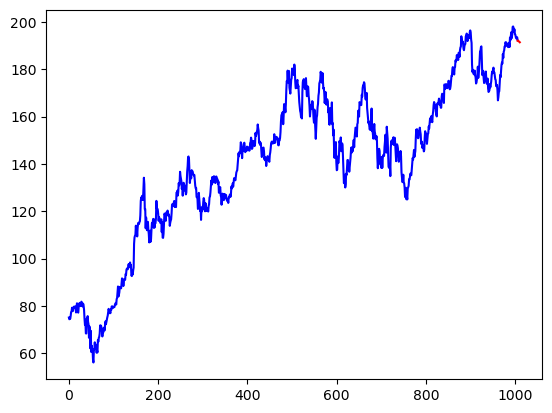

In [59]:
# YOUR CODE HERE
end = len(close_prices) - 1
plt.plot(close_prices, 'b')
xs = np.linspace(end, end + len(wiener_predicted_signal), num = len(wiener_predicted_signal))
plt.plot(xs, wiener_predicted_signal, 'r')

## 3.2 Evaluation of the Wiener filter

To evaluate the quality of the Wiener predictions, the following metrics will be calculated: MAE, MSE, and RMSE (see Section 2 for further details).


**Your task is as follows**:
*   **Calculate evaluation metrics**:
  *   Using the predicted values from the Wiener filter (`wiener_predicted_signal`) and the actual values from the signal (`actual_values`), compute the following metrics: MAE, MSE, and RMSE.

*   **Display results**:
  *   Print the results in a formatted output to clearly show the values of each metric.

In [60]:
#YOUR CODE HERE
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Actual values for comparison (last steps of the original signal)
actual_values = close_prices[end - predict_steps + 1:]

# Evaluate metrics
mae = mean_absolute_error(actual_values, wiener_predicted_signal)
mse = mean_squared_error(actual_values, wiener_predicted_signal)
rmse = root_mean_squared_error(actual_values, wiener_predicted_signal)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 1.3483
Mean Squared Error (MSE): 1.9280
Root Mean Squared Error (RMSE): 1.3885


---

**Question**: What does the value of MAE mean in this context? How do you interpret this result?

<font color = 'green'> YOUR ANSWER HERE </font>

The MAE measure is the sum of the distances between the predicted samples and the actual samples.

---

---

**Question**: If you had to choose a metric to evaluate the quality of predictions, would you use MAE, MSE, or RMSE? Why?

<font color = 'green'> YOUR ANSWER HERE </font>

Since all the metrics are absolute errors and we know our data, we don't really care about which one we use.

---

---

**Question**: Based on these values, do you think the Wiener filter provides accurate predictions? Why or why not?

<font color = 'green'> YOUR ANSWER HERE </font>

Given the fact that our values ascend to the hundreds and our errors are all between $0$ and $2$, I think it is good enough.

---

## 3.3 Tune parameters of the Wiener filter

In this section, the student will tune and analyze the impact of the Wiener filter parameters on the prediction quality of the signal `close_prices`. Specifically, the focus will be on exploring different filter orders and evaluating their effect on error metrics.

Steps to follow:

1.   **Parameters to explore**

  Analyze how the filter order influences the Wiener filter's performance. Experiment with the following filter orders:
  *   Filter orders: `[5, 10, 15, 20, 30, 40, 50]`


2.   **Calculate the metrics**

  For each filter order, compute the metrics MAE, MSE, and RMSE by comparing the predicted values (`wiener_predicted_signal`) with the actual values (`actual_values`). Determine the filter order that results in the lowest RMSE and store it as the optimal parameter.


3.   **Print the results**

  After evaluating all filter orders, display the optimal parameter and its corresponding RMSE.

In [61]:
#YOUR CODE HERE
wiener_filter_orders = [5, 10, 15, 20, 30, 40, 50]
wiener_rmses = []
for fo in wiener_filter_orders:
    wiener_pred = (wiener_filter(close_prices_normalized, fo, predict_steps) * std_close) + mean_close
    wiener_rmses.append(root_mean_squared_error(actual_values, wiener_pred))
print(wiener_rmses)
print(np.argmin(wiener_rmses))

[np.float64(1.1987008505281722), np.float64(1.3885386992062332), np.float64(1.429381130187098), np.float64(1.1178072301679292), np.float64(1.1575212553266867), np.float64(1.2920677018167006), np.float64(2.0470523910172815)]
3


---

**Question**: What is the optimal filter order for the Wiener filter among the explored values?

<font color = 'green'> YOUR ANSWER HERE

The optimal Wiener filter is an order-20 filter.

---

---

**Question**: How does increasing the filter order affect the performance?

<font color = 'green'> YOUR ANSWER HERE

If we increase the order too much, we will take more samples of the signal, and since this signal does not come from a stationary process, the Wiener filter will perform badly in this scenario.

---

# 4.Adaptive filter

The **LMS (Least Mean Squares) adaptive** filter is a powerful tool for prediction and signal processing. Unlike the Wiener filter, which computes fixed optimal weights from the entire dataset, the LMS filter dynamically updates its weights with each new data sample. This adaptability makes the LMS filter especially effective in non-stationary environments where data patterns change over time.

In this section, students will implement the LMS filter, apply it to predict future stock prices, and evaluate its performance using metrics such as MAE, MSE, and RMSE. By comparing its predictions to those of the Wiener filter, the objective is to explore the strengths and limitations of adaptive filtering in the context of stock price forecasting.



## 4.1 Implementation of the `lms_filter` function

In this section, the student will implement the `lms_filter` function. This function will predict future stock prices based on past data, demonstrating the adaptive capabilities of the LMS filter.

**Your task is as follows**:

Implement the core steps of the LMS filter for prediction. Follow these instructions to implement the most critical lines of the algorithm.



1.  **Initialize weights**

  *   Begin by initializing the weight vector (`weights`) with small random values to avoid biasing the model. This ensures that the algorithm starts with unbiased weights near zero.
  *   Use the `np.random.rand()`  function to generate a vector of size `order` with random values between $0$ and $1$. Scale these values  by multiplying them by $0.025$ to ensure the weights are sufficiently small.


2.  **Select past values**

  *   For each prediction step, extract the most recent order values from the signal to create the input for the filter:  
       *   **First prediction step**: Use the last order elements of the signal as input.
       *   **Subsequent Steps**: Combine the most recent elements of the signal with the previously predicted values to form the input for the filter.

3.  **Ensure consistent input length**

  *   If the length of `past_values` is less than `order` (e.g., at the beginning of the sequence), pad it with zeros to ensure it matches the required size.

4.  **Prediction**

  *   Calculate the predicted value by taking the dot product of the weight vector and the past values.

5.  **Update weights**

  *   **Compute prediction error**: If real future values of the signal are available, calculate the prediction error.
  *   **Update Weights Dynamically**: Update the weights dynamically using the LMS formula.
    $\mathbf{w}_\text{new} = \mathbf{w}_\text{old} + \mu \cdot e \cdot \mathbf{x}$
  


In [62]:
# YOUR CODE HERE
def lms_filter(signal, order, predict_steps, learning_rate):
    """
    LMS filter for prediction.

    Parameters:
        signal (array): Input signal (normalized).
        order (int): Number of past values to consider.
        predict_steps (int): Number of steps to predict.
        learning_rate (float): Learning rate for weight updates.

    Returns:
        predicted_signal (array): Predicted values.
        weights (array): Final weights after learning.
    """
    n = len(signal)
    # 1. Initialize weights
    weights = np.random.rand(order) * .025

    predicted_signal = np.zeros(predict_steps)  # Array to store predictions

    # 2. Select past values
    for step in range(predict_steps):
        # Use past values to predict the next step
        if step == 0:
            past_values = signal[-order:]
        else:
            past_values = np.concatenate((signal[-order + step:], predicted_signal[:step]))

        # 3. Ensure consistent input length
        if len(past_values) < order:
            past_values = np.concatenate(past_values, np.zeros(order - len(past_values)))

        # 4. Prediction
        prediction = np.dot(weights, past_values)
        predicted_signal[step] = prediction

        # 5. Update weights (if there are real future values available)
        if n + step < len(signal):
            error = signal[n + step] - prediction
            weights = weights +  learning_rate * error * past_values[-order:]

    return predicted_signal, weights

### 4.1.1 Obtaining predictions

After implementing the `lms_filter` function,  it will be applied to generate predictions for AAPL stock prices.

**Your task is as follows**:
*   Initialize filter parameters:
      *   `order = 100` (filter order)
      *   `predicted_steps = 5` (number of steps to predict)
      *   `learning_rate = 0.4` (step size of the weight update)

*   Apply the Wiener filter:
  *   Use the `lms_filter` function to obtain the predicted signal.
  *   The filter should be applied to the normalized closing prices (`close_prices_normalized`) using the specified `order` (filter order), `predicted_steps` (number of prediction steps), and `learning_rate` (step size for weight updates).


* Denormalize the predictions.

   *  To convert the predictions back to their original scale, use the following formula:

     $\qquad \text{denormalized} = (\text{normalized} \times \text{scale factor}) + \text{offset}$

    where:  
    *   `scale_factor` corresponds to the range or standard deviation used during normalization (variable `std_close` calculated in Section 1.4).
    *   `offset` is the mean  value used to shift the data during normalization (variable `mean_close` computed in Section 1.4).


In [63]:
# YOUR CODE HERE
order = 100
predict_steps = 5
learning_rate = .4

In [64]:
# YOUR CODE HERE
# Appling the LMS filter
lms_predicted_signal_normalized, final_weights = lms_filter(close_prices_normalized, order, predict_steps, learning_rate)

In [65]:
# YOUR CODE HERE
# Denormalize predictions
lms_predicted_signal = (lms_predicted_signal_normalized * std_close) + mean_close

**Your task is as follows**:
*   Create a plot to visualize the actual closing prices and the LMS predictions for AAPL. Use the following steps:
      *   Plot the actual closing prices (`close_prices`) over the range of their indices with a label `Actual prices`.
      *   Plot the predicted values (`lms_predicted_signal`) over the extended range, starting from the end of the actual data. Label them as `LMS predictions`.
      *   Add appropriate labels for the X-axis (`Days`) and Y-axis (`Close price (USD)`).
      *   Include a title for the plot: `Wiener Predictions for AAPL`.
      *   Add a legend to distinguish between actual prices and predictions.

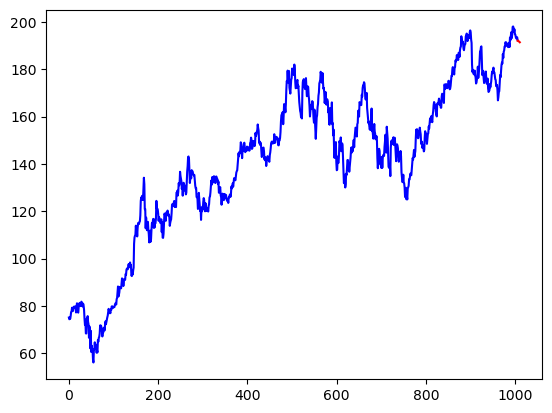

In [66]:
# YOUR CODE HERE
plt.plot(close_prices, 'b')
xs = np.linspace(end, end + len(wiener_predicted_signal), num = len(wiener_predicted_signal))
plt.plot(xs, wiener_predicted_signal, 'r')

## 4.2 Evaluation of the LMS filter

To evaluate the quality of the LMS predictions, the following metrics will be calculated: MAE, MSE, and RMSE (see Section 2 for further details), just as was done with the Wiener filter.


**Your task is as follows**:
*   **Calculate evaluation metrics**:
  *   Using the predicted values from the Wiener filter (`lms_predicted_signal`) and the actual values from the signal (`actual_values`), compute the following metrics: MAE, MSE, and RMSE.

*   **Display results**:
  *   Print the results in a formatted output to clearly show the values of each metric.

In [67]:
#YOUR CODE HERE
# Actual values for comparison (last steps of the original signal)
actual_values = actual_values

# Evaluate metrics
mae = mean_absolute_error(actual_values, lms_predicted_signal)
mse = mean_squared_error(actual_values, lms_predicted_signal)
rmse = root_mean_squared_error(actual_values, lms_predicted_signal)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 3.6996
Mean Squared Error (MSE): 13.9539
Root Mean Squared Error (RMSE): 3.7355


---

**Question**: Based on the calculated evaluation metrics (MAE, MSE, and RMSE) for both the Wiener and LMS filters when predicting 5 values:



1.   Which filter demonstrates better predictive performance, and why?
2.   What might explain the difference in performance between the two filters, considering their design and adaptability?



<font color = 'green'> YOUR ANSWER HERE

1. The LMS filter seems to do a bit better than the Wiener filter in this situation, since our stochastic process is not stationary in any sense.
2. The LMS filter does not need the process to be stationary, therefore it performs better in this situation, since its weights are ever-changing.

---

## 4.3 Tune parameters of the LMS filter

In this section, the student will tune and analyze the impact of LMS filter parameters on the prediction quality of the signal `close_prices`. Specifically, the student will explore combinations of filter order and learning rate, and evaluate their effect on error metrics.


In this section, the student will tune and analyze the impact of LMS  filter parameters on the prediction quality of the signal `close_prices`. Specifically, the focus will be on exploring  combinations of filter order and learning rate, and evaluate their effect on error metrics.

**Steps to follow:**

*   **Parameters to explore**

  Analize how both filter order and learning rate influence the performance of the LMS filter. It will be experimented with the following values:
  *   Filter orders: `[10, 50, 100, 150]`
  *   Learning rates: `[0.1, 0.5, 1, 2, 5]`


*   **Calculate the metrics**

  For each parameter combination, compute the metrics MAE, MSE, and RMSE by comparing the predicted values (`lms_predicted_signal`) with the actual values (`actual_values`). Determine the filter order that results in the lowest RMSE and store it as the optimal parameter.

*   **Print the results**

   After evaluating all filter orders, display the optimal parameter and its corresponding RMSE.



In [68]:
#YOUR CODE HERE
lms_filter_orders = [10,50,100,150]  # Filter order values to experiment with
learning_rates = [0.1,0.5,1,2,5]  # Learning rates to test
lms_rmses = np.zeros([len(lms_filter_orders), len(learning_rates)])
#weights = np.zeros([predict_steps, len(filter_orders) * len(learning_rates)])
for i in range(0, len(lms_filter_orders)):
    for j in range(0, len(learning_rates)):
        fo = lms_filter_orders[i]
        lr = learning_rates[j]
        lms_prediction, _ = lms_filter(close_prices_normalized, fo, predict_steps, lr)
        lms_prediction = lms_prediction * std_close + mean_close
        lms_rmses[i, j] = (root_mean_squared_error(actual_values, lms_prediction))

print(lms_rmses)
argmin = np.argmin(lms_rmses)
print(f'Best paremeters\' index: {argmin}\n'
      f'Best order: {lms_filter_orders[np.unravel_index(argmin, [4, 5])[0]]}\n'
      f'Best learning rate: {learning_rates[np.unravel_index(argmin, [4, 5])[1]]}')

[[47.60794403 45.64734277 46.80431638 47.50123834 48.01393431]
 [23.09155555 22.47355414 22.87495381 26.88079427 22.24096054]
 [ 2.49688956  0.82074873  7.28682482  2.86115602  5.27057645]
 [27.81911327 36.4922593  27.14246067 32.15243369 30.04320184]]
Best paremeters' index: 11
Best order: 100
Best learning rate: 0.5


---

**Question**: How does increasing the filter order affect the performance?

<font color = 'green'> YOUR ANSWER HERE

The LMS filter adapts to any process, regardless its characteristics. Then, why does its performance decrease when the order is too big?

---

---

**Question**: What happens when the learning rate is too high?

<font color = 'green'> YOUR ANSWER HERE

If the learning rate is too high, the next prediction could overshoot, and therefore the results would be worse. It could also happen that our prediction starts oscillating.

---

---

**Question**: Are the optimal parameters intuitive? Why or why not?

<font color = 'green'> YOUR ANSWER HERE

The higher the order, the bigger the calculated error in each iteration. Therefore, if we put a high learning rate together with a high order, we might end up overshooting the prediction. If the opposite happens, we risk undershooting it. Nevertheless, it depends on the data, and there is no threshold from which we can say our filter will stop working correctly.

---

# 5.Comparison of filters

In this final section, it will be compared the performance of the Wiener filter and the LMS adaptive filter in predicting stock prices using the AAPL dataset. By evaluating their predictions against the actual stock prices, the goal is to understand the strengths and limitations of each filter in terms of prediction accuracy.

Specifically, students will:

1.   **Apply both filters** using their optimal configurations (best filter order and learning rate).
2.   **Calculate error metrics** (MAE, MSE, and RMSE) for each filter to evaluate their predictive performance.
3.   **Visualize the results** by plotting the actual stock prices  alongside the predictions from both filters.



**Your task is as follows**:

*   **Define the optimal parameters**

      Identify the optimal parameters for both filters. Use the best filter order for the Wiener filter and the best filter order and learning rate for the LMS filter.

*   **Apply both filters**

      Use the defined parameters to make predictions with both filters.

*   **Calculate error metrics**

      Evaluate the performance of both filters by calculating MAE, MSE, and RMSE for their predictions.

*    **Compare the results**

      Print the error metrics for both filters to see which performs better.

*    **Visualize the predictions**

      Plot the actual stock prices alongside the predictions from both filters for a clear visual comparison.

100
Comparison of filters:

Wiener Filter - MAE: 1.0909, MSE: 1.2495, RMSE: 1.1178
LMS Filter    - MAE: 2.8792, MSE: 8.6961, RMSE: 2.9489


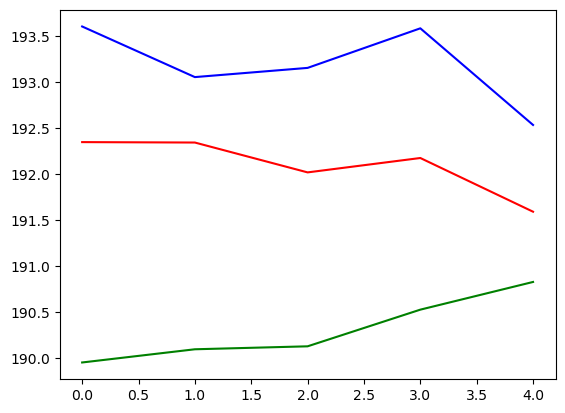

In [69]:
#YOUR CODE HERE
# --- Best configurations for Wiener and LMS filters ---
best_wiener_order = wiener_filter_orders[np.argmin(wiener_rmses)]
best_idx = np.unravel_index(np.argmin(lms_rmses), (len(lms_filter_orders), len(learning_rates)))
best_lms_order = lms_filter_orders[best_idx[0]]
best_lms_learning_rate = learning_rates[best_idx[1]]

print(best_lms_order)

# --- Apply Wiener filter ---
predicted_signal_wiener_normalized = wiener_filter(close_prices_normalized, best_wiener_order, predict_steps)
predicted_signal_wiener = (predicted_signal_wiener_normalized * std_close) + mean_close

# --- Apply LMS filter ---
predicted_signal_lms_normalized, _ = lms_filter(close_prices_normalized, best_lms_order, predict_steps, best_lms_learning_rate)
predicted_signal_lms = (predicted_signal_lms_normalized * std_close) + mean_close

# --- Calculate actual values for comparison ---
actual_values = actual_values

# --- Calculate error metrics for Wiener ---
mae_wiener = mean_absolute_error(actual_values, predicted_signal_wiener)
mse_wiener = mean_squared_error(actual_values, predicted_signal_wiener)
rmse_wiener = root_mean_squared_error(actual_values, predicted_signal_wiener)

# --- Calculate error metrics for LMS ---
mae_lms = mean_absolute_error(actual_values, predicted_signal_lms)
mse_lms = mean_squared_error(actual_values, predicted_signal_lms)
rmse_lms = root_mean_squared_error(actual_values, predicted_signal_lms)

# --- Print comparison ---
print("Comparison of filters:\n")
print(f"Wiener Filter - MAE: {mae_wiener:.4f}, MSE: {mse_wiener:.4f}, RMSE: {rmse_wiener:.4f}")
print(f"LMS Filter    - MAE: {mae_lms:.4f}, MSE: {mse_lms:.4f}, RMSE: {rmse_lms:.4f}")

# --- Plot results ---

plt.plot(close_prices[-predict_steps:], 'b')
plt.plot(predicted_signal_wiener, 'r')
plt.plot(predicted_signal_lms, 'g')